In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'database_votes.csv')

In [2]:
df=df.dropna()
df

,Unnamed: 0,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,pour,contre,non_votants,non_votants_volontaires,abstention,resultat
0,0,0,PA606171,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
1,1,0,PA721824,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
2,2,0,PA719952,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
3,3,0,PA607395,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
4,4,0,PA718710,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308924,308924,3116,PA335612,Pour,PO730940,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,26,41,2,0,6,rejeté
308925,308925,3116,PA607619,Contre,PO759900,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,26,41,2,0,6,rejeté
308926,308926,3116,PA719608,Pour,PO723569,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,26,41,2,0,6,rejeté
308927,308927,3116,PA721932,Pour,PO723569,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,73,26,41,2,0,6,rejeté


In [3]:
Scrutins = df['titre'].unique()
print("Il y a ", len(Scrutins) , "scrutins différents")



Il y a  3109 scrutins différents


In [4]:
Votants = df['idVotant'].unique()
Votants.astype(str)
print("Il y a ", len(Votants) , "votants différents")


Il y a  638 votants différents


In [5]:
Nombre_votants_par_scrutin = df.groupby("titre")['votants'].count().reset_index().sort_values(by='votants',ascending = False)
Nombre_votants_par_scrutin

,titre,votants
1899,l'amendement n° 793 de M. Ruffin à l'article 3...,575
1413,l'amendement n° 36 de M. Bernalicis après l'ar...,574
2556,l'ensemble de la proposition de loi relative à...,574
2637,l'ensemble du projet de loi de finances rectif...,573
2568,l'ensemble de la proposition de loi visant à a...,572
...,...,...
997,l'amendement n° 226 de M. Huyghe après l'artic...,23
2516,l'article unique du projet de loi autorisant l...,22
1090,l'amendement n° 242 de Mme Autain et les amend...,20
2849,"la motion de renvoi en commission, déposée par...",18


In [6]:
Avis_votant = pd.DataFrame(df.groupby(['idVotant']).vote.value_counts())
Avis_votant=Avis_votant.rename(columns={'vote':'nombre'})
Total_votant = df.groupby(['idVotant']).vote.count()


In [7]:
#Création d'un tableau répetoriant pour chaque votant sa proportion de Pour/Contre

Avis_votant = pd.DataFrame(df.groupby(['idVotant']).vote.value_counts())
Avis_votant=Avis_votant.rename(columns={'vote':'nombre'})
Total_votant = df.groupby(['idVotant']).vote.count()
Proportion_vote = pd.DataFrame({'Proportion' : Avis_votant['nombre'].div(Total_votant)*100})
Proportion_vote

Proportion
idVotant vote              
PA1008   Pour     68.944099
         Contre   31.055901
PA1012   Pour     65.765766
         Contre   34.234234
PA1029   Contre   51.818182
...                     ...
PA923    Contre   41.991342
PA942    Contre   50.111359
         Pour     49.888641
PA998    Contre   55.000000
         Pour     45.000000

[1290 rows x 1 columns]

In [8]:
times = pd.DatetimeIndex(df.date_scrutin)
df2 = df.set_index(keys = times)


In [9]:
#df3 = pd.DataFrame(df2.groupby(by=[pd.Grouper(freq='1A', base = 0, label = 'left'),'idVotant','vote','titre']))


In [10]:
Demandeurs = df.groupby("demandeur")['resultat'].count().reset_index().sort_values(by='resultat',ascending = False)
Demandeurs


,demandeur,resultat
73,"Président du groupe ""Les Républicains""",60422
27,"Président du groupe ""La France insoumise""",50986
119,"Président du groupe ""de la Gauche démocrate et...",35943
155,"Présidente du groupe ""Socialistes et apparentés""",27773
4,Conférence des Présidents,24929
...,...,...
144,"Président( du groupe ""La France insoumise""",36
120,"Président du groupe ""de la Gauche démocrate et...",35
111,"Président du groupe ""UDI, Agir et Indépendants...",34
54,"Président du groupe ""La République en Marche""\...",33


In [11]:
#Proportion et nombre de propositions adoptées/rejetées par demandeur 
Resultats_demandeur = pd.DataFrame(df.groupby(['demandeur']).resultat.value_counts())
Resultats_demandeur=Resultats_demandeur.rename(columns={'resultat':'nombre'})

demandeurs = df.groupby(['demandeur']).resultat.count()
Proportion_dem = pd.DataFrame({'Proportion' : Resultats_demandeur['nombre'].div(demandeurs)*100})

Proportion_resultats_dem=pd.concat([Resultats_demandeur,Proportion_dem['Proportion']],axis=1)
Proportion_resultats_dem

,,nombre,Proportion
demandeur,resultat,,
"""\rPresident(e) du groupe ""de la Gauche démocrate et républicaine""",rejeté,132,100.000000
Commission,adopté,78,100.000000
Commission spéciale,adopté,94,100.000000
Conference des Presidents,adopté,446,100.000000
Conférence des Présidents,adopté,23372,93.754262
...,...,...,...
"Présidente du groupe ""Socialistes et apparentés""Président du groupe ""UDI, Agir et Indépendants""",rejeté,131,100.000000
"Présidente du groupe ""Socialistes et apparentés""Président du groupe ""UDI, Agir et Indépendants""Président du groupe ""Libertés et Territoires""",adopté,123,100.000000
"Présidente du groupe ""Socialistes et apparentés""Président du groupe ""de la Gauche démocrate et républicaine""",rejeté,436,55.329949


In [106]:
Partis = pd.DataFrame(df.groupby('idVotant')['organeRefGroupe'].unique())


In [107]:
#Création d'un indice qui donne le pourcentage de comptabilité entre le vote du votant (Pour/Contre) et la décision finale (Accord/Rejet)
df3= df[((df.vote == 'Pour') & (df.resultat == 'adopté')) | ((df.vote == 'Contre') & (df.resultat == 'rejeté'))]

Accord_votant = df3.idVotant.value_counts() 
Total_votant = df.idVotant.value_counts()

IndiceAccord=[]

Partis2 = []
Nom_Partis = []
Votants2=df3['idVotant'].unique()
for votant in Votants2:     
    IndiceAccord.append(int(Accord_votant[votant])/int(Total_votant[votant])*100)
    Partis2.append(Partis.organeRefGroupe[votant][0])
    Nom_Partis.append(Partis.organeRefGroupe[votant][0])

    


In [108]:
IndiceAccordDF = pd.DataFrame({'idVotant' : Votants2,
                               'IndiceAccord' : IndiceAccord,
                               'Parti' : Partis2,
                               'Nom_Parti' : Nom_Partis})

In [113]:
#Certains groupes politiques reviennent plusieurs fois sous des ID différents, on va donc les regrouper

New=IndiceAccordDF.Nom_Parti.copy()
New=New.replace(['PO774834','PO730970'],'MoDem')
New=New.replace(['PO730964'],'LREM')
New=New.replace(['PO771789'],'Ecologie Démocratie Solidarité')
New=New.replace(['PO771923'],'Agir Ensemble')
New=New.replace(['PO767217','PO744425'],'UDI_Agir')
New=New.replace(['PO765636','PO771889'],'UDI_Independants')
New=New.replace(['PO730952'],'Les Constructifs')
New=New.replace(['PO759900'],'Libertés et Territoires')
New=New.replace(['PO730934'],'LR')
New=New.replace(['PO723569'],'Non inscrits')
New=New.replace(['PO730946'],'Nouvelle Gauche')
New=New.replace(['PO758835'],'Socialistes')
New=New.replace(['PO730940'],'Gauche Dem et Rep')
New=New.replace(['PO730958'],'France Insoumise')



In [110]:
IndiceAccordDF['Nom_Parti']=New

In [111]:
ResultatsPartis = IndiceAccordDF.groupby('Nom_Parti')['IndiceAccord'].describe()
ResultatsPartis.sort_values(by="mean",ascending = False)

,count,mean,std,min,25%,50%,75%,max
Nom_Parti,,,,,,,,
LREM,322.0,72.919510,6.233247,19.478403,71.892269,74.255322,75.659075,88.000000
MoDem,52.0,69.768698,7.897399,46.900270,66.732106,70.145256,72.606597,100.000000
Ecologie Démocratie Solidarité,4.0,64.833684,3.460599,60.080645,64.015136,65.436426,66.254974,68.381241
Agir Ensemble,6.0,64.010349,6.458783,55.670103,60.565580,64.161634,65.529045,74.716981
Les Constructifs,3.0,49.304243,7.958870,40.145985,46.683637,53.221289,53.883372,54.545455
UDI_Agir,20.0,48.782029,10.364085,25.000000,45.998145,47.796702,53.807631,67.410714
UDI_Independants,7.0,47.359058,11.962732,27.272727,44.762373,48.421053,49.045785,68.203310
Libertés et Territoires,18.0,45.184510,13.353068,29.652352,35.391757,41.765463,52.723973,72.018349
LR,117.0,39.073104,5.828192,14.285714,36.994220,39.002933,41.509434,58.333333


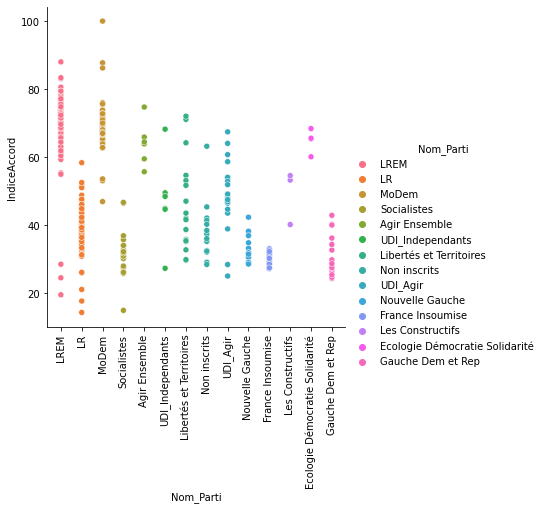

In [112]:
plot=sns.relplot(data=IndiceAccordDF,kind="scatter", x="Nom_Parti",y="IndiceAccord", hue="Nom_Parti")
plot.set_xticklabels(rotation=90)